# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

In [2]:
# Data Load
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# train, test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=2022)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

### length끼리, width끼리

In [5]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [6]:
tr_x_l = x_train.loc[:, ['sepal length (cm)', 'petal length (cm)']]
tr_x_w = x_train.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [7]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [8]:
te_x_l = x_test.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = x_test.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [10]:
te_x_l.shape, te_x_w.shape, y_train.shape

((30, 2), (30, 2), (120, 3))

### Modeling : multi-input & Concatenate Layer

In [11]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [12]:
# 1. Session Clear
clear_session()

# 2. Layer
il_l = Input(shape=(2,))
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input(shape=(2,))
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. Model
model = Model([il_l, il_w], ol)

# 4. Compile
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

### Model Visualization

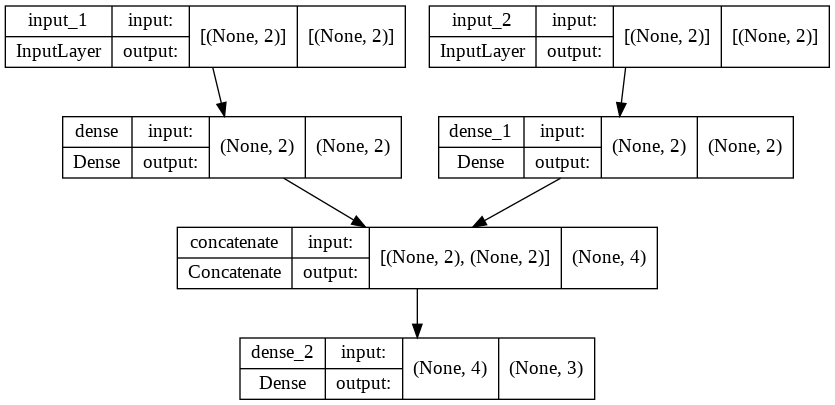

In [14]:
plot_model(model, show_shapes=True)

In [15]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=2,
                   verbose=1,
                   restore_best_weights=True)

In [17]:
# 5. fit
model.fit([tr_x_l, tr_x_w], y_train, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 3s 81ms/step - loss: 1.4620 - accuracy: 0.3235 - val_loss: 1.2403 - val_accuracy: 0.4444
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4442 - accuracy: 0.3235 - val_loss: 1.2276 - val_accuracy: 0.4444
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.4263 - accuracy: 0.3235 - val_loss: 1.2151 - val_accuracy: 0.4444
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4098 - accuracy: 0.3235 - val_loss: 1.2028 - val_accuracy: 0.4444
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.3930 - accuracy: 0.3235 - val_loss: 1.1909 - val_accuracy: 0.4444
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.3766 - accuracy: 0.3235 - val_loss: 1.1794 - val_accuracy: 0.4444
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.3611 - accuracy: 0.3235 - val_loss: 1.1683 - val_accuracy: 0.4444
Epoch 8/1000
